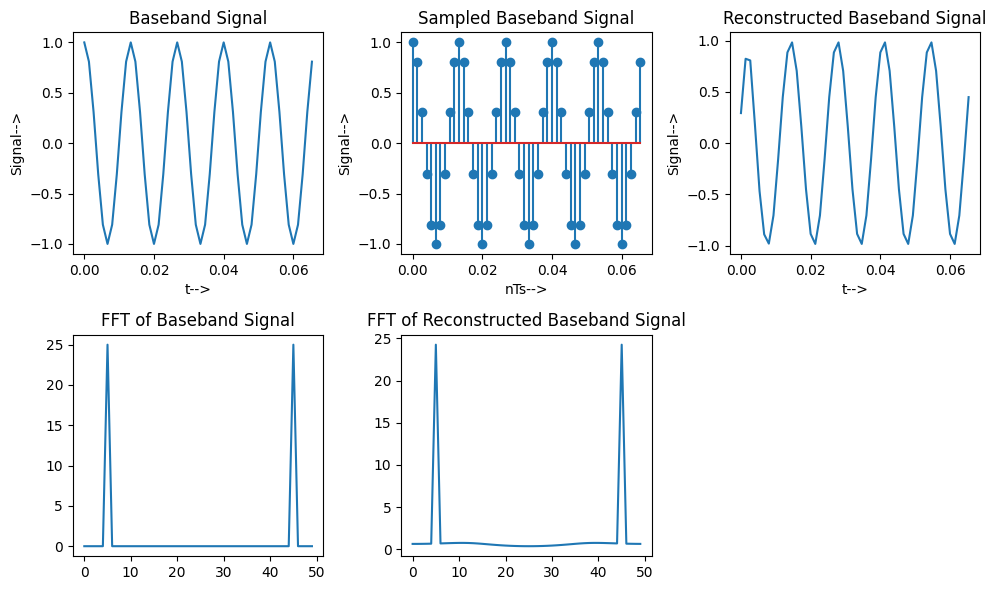

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy import signal

f = 75  # Baseband signal frequency (Hz)
M = 10  # Minimum for Nyquist Criteria: fs>=2fmax
fs = M * f  # Sampling frequency (Hz)
T = 1 / f  # Time period of baseband signal (s)
t = np.arange(0, 5 * T, 0.1 * T)  # Time points for baseband signal (s)
ts = np.arange(0, 5 * T, 1 / fs)  # Sampling time points (s)
x = np.cos(2 * np.pi * f * t)  # Baseband signal construction

# Plotting all graphs side by side
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

# Plotting baseband signal
axs[0, 0].plot(t, x)
axs[0, 0].set_title("Baseband Signal")
axs[0, 0].set_xlabel("t-->")
axs[0, 0].set_ylabel("Signal-->")

# Plotting sampled baseband signal
xs = np.cos(2 * np.pi * f * ts)
axs[0, 1].stem(ts, xs)
axs[0, 1].set_title("Sampled Baseband Signal")
axs[0, 1].set_xlabel("nTs-->")
axs[0, 1].set_ylabel("Signal-->")

# Reconstructing baseband signal
wp = (fs / 2) / fs  # pass-band frequency
ws = (fs - 10) / fs  # stop-band frequency
apb = 3  # pass-band attenuation in dB
asb = 60  # stop-band attenuation in dB
[N, Wn] = signal.buttord(wp, ws, apb, asb)  # determining order and cut-off frequency of lpf.
[b, a] = signal.butter(N, Wn, 'low')  # finding constants for lpf.
xr = signal.lfilter(b, a, xs)  # baseband signal reconstruction.
axs[0, 2].plot(t, xr)
axs[0, 2].set_title("Reconstructed Baseband Signal")
axs[0, 2].set_xlabel("t-->")
axs[0, 2].set_ylabel("Signal-->")

# Plotting FFT of baseband signal
x_f = fft(x)
axs[1, 0].plot(abs(x_f))
axs[1, 0].set_title("FFT of Baseband Signal")

# Plotting FFT of reconstructed baseband signal
xr_f=fft(xr)  
axs[1, 1].plot(abs(xr_f))
axs[1, 1].set_title("FFT of Reconstructed Baseband Signal")

# Hiding empty subplot
axs[1, 2].axis('off')

# Adjusting layout and displaying plots
plt.tight_layout()
plt.show()

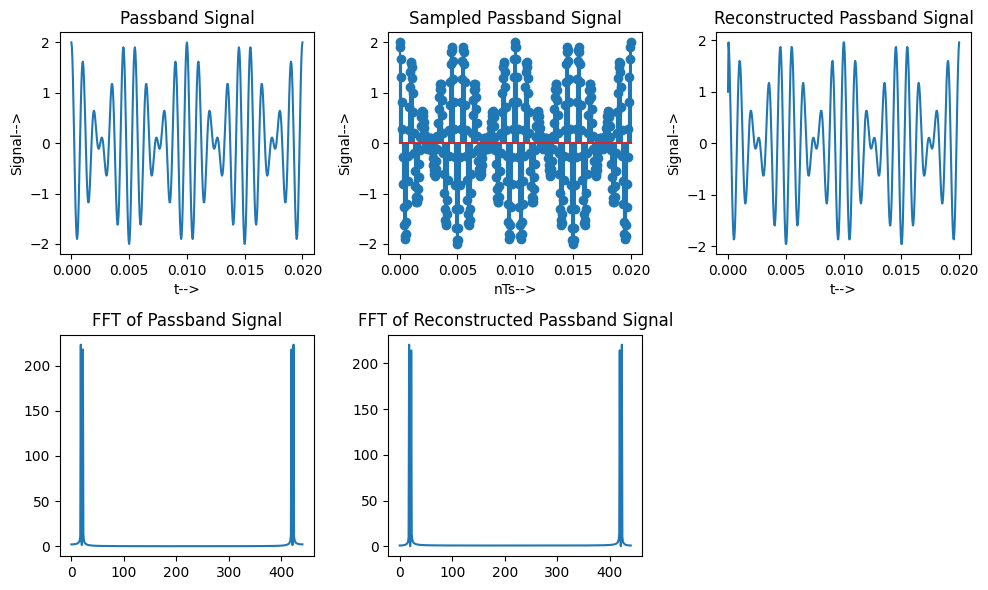

In [2]:
import numpy as np
import matplotlib.pyplot as mplt
from scipy.fft import fft
from scipy import signal
f=100 #passband signal frequency in Hz.
M=20 #minimum, M=2, for Nyquist Criteria : fs>=2fmax.
A=1 #Amplitude of passband signal.
fc=1000 #carrier signal frequency in Hz.
Ac=2 #carrier signal amplitude.
fs=M*(f+fc) #sampling frequency in Hz.
T=1/f #time period of passband signal in s.
Ts=1/fs #Sampling Time period in s.
t=np.arange(0,2*T,1*Ts) #time of passband signal in s.
ts=np.arange(0,2*T,1*Ts) #sampling time of passband signal in s.
x=A*np.cos(2*np.pi*f*t) #passband signal construction.
xc=Ac*np.cos(2*np.pi*fc*t) #carrier signal construction.
X=np.multiply(x,xc) #Resultant passband signal. (DSBSC)

# Plotting all graphs side by side
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

axs[0, 0].plot(t,X) #passband signal plotting.
axs[0, 0].set_title("Passband Signal")
axs[0, 0].set_xlabel("t-->")
axs[0, 0].set_ylabel("Signal-->")

xs=A*np.cos(2*np.pi*f*ts) #sampled passband signal construction.
xc_s=Ac*np.cos(2*np.pi*fc*ts) #sampled carrier signal construction.
Xs=np.multiply(xs,xc) #Resultant sampled passband signal.
axs[0, 1].stem(ts,Xs) #sampled passband signal plotting.
axs[0, 1].set_title("Sampled Passband Signal")
axs[0, 1].set_xlabel("nTs-->")
axs[0, 1].set_ylabel("Signal-->")

wp=(fs/2)/fs #pass-band frequency
ws=(fs-10)/fs #stop-band frequency
apb=3 #pass-band attenuation in dB
asb=60 #stop-band attenuation in dB
[N, Wn]=signal.buttord(wp,ws,apb,asb) #determining order and cut-off frequency of lpf.
[b, a]=signal.butter(N,Wn,'low') #finding constants for lpf.
Xr=signal.lfilter(b,a,Xs) #passband signal reconstruction.
axs[0, 2].plot(t,Xr) #reconstructed passband signal plotting.
axs[0, 2].set_title("Reconstructed Passband Signal")
axs[0, 2].set_xlabel("t-->")
axs[0, 2].set_ylabel("Signal-->")

X_f=fft(X) #fft of passband signal.
axs[1, 0].plot(abs(X_f)) #plot of fft of passband signal.
axs[1, 0].set_title("FFT of Passband Signal")

Xr_f=fft(Xr) #fft of reconstructed passband signal.
axs[1, 1].plot(abs(Xr_f)) #plot of fft of reconstructed passband signal.
axs[1, 1].set_title("FFT of Reconstructed Passband Signal")


# Hiding empty subplot
axs[1, 2].axis('off')

# Adjusting layout and displaying plots
plt.tight_layout()
plt.show()